In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [8]:
heart = pd.read_csv('heart_2020_cleaned.csv')

heart.shape

(319795, 18)

In [6]:
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [7]:
heart.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [9]:
heart.HeartDisease.unique()

array(['No', 'Yes'], dtype=object)

In [10]:
heart.loc[ heart['HeartDisease']=="No" ,   'HeartDisease_0_1'] = 0
heart.loc[ heart['HeartDisease']=="Yes" ,   'HeartDisease_0_1'] = 1

heart['HeartDisease_0_1'] = heart['HeartDisease_0_1'].astype("int32")
heart.HeartDisease_0_1.unique()

array([0, 1], dtype=int32)

In [11]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [12]:
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_0_1
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,0
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,0
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,0
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,0
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,0


In [13]:
# BMI, PyysicalHealth, MentalHealth, SleepTime
sel = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

X = heart[sel]
y = heart['HeartDisease_0_1']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((255836, 4), (63959, 4), (255836,), (63959,))

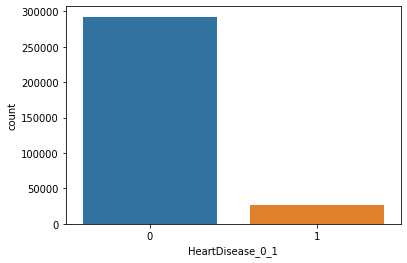

In [14]:
sns.countplot(x="HeartDisease_0_1", data=heart)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
print("의사결정트리 score :", model1.score(X_train, y_train), model1.score(X_test, y_test) )

의사결정트리 score : 0.9490103034756641 0.886364702387467


In [20]:
model2 = RandomForestClassifier(max_depth=4, n_estimators=30, random_state=0)
model2.fit(X_train, y_train)
print("랜덤포레스트 score :", model2.score(X_train, y_train), model2.score(X_test, y_test) )

랜덤포레스트 score : 0.9142966587970418 0.9148360668553291


In [21]:
model3 = KNeighborsClassifier()
model3.fit(X_train,y_train)
print('knn score : ',model3.score(X_train,y_train),model3.score(X_test,y_test) )

knn score :  0.9163448459169156 0.9081442799293298


In [22]:
model4 = LogisticRegression()
model4.fit(X_train,y_train)
print('로지스틱 회귀 score :',model4.score(X_train,y_train),model4.score(X_test,y_test) )

로지스틱 회귀 score : 0.9142888412889507 0.9148360668553291


* 4가지 모델로 확인 결과 , 랜덤 포레스트와 로지스틱 회귀가 좋은 결과로 나왔다.
* 추후에 파라미터 튜닝과 피쳐 엔지니어링을 통해 모델 개선을 해볼 것이다.